# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - In today's digital world, users spent considerable amount of time on the internet. For the music platforms, it means providing best experience. We acheive this by keeping users engaged. This helps platform grow to acheive their revenue expectations.

### **The objective:**

 - Recommendation system help provide better engagement with users. If we can recommend new songs that users will enjoy, it provides added value apart from users listening to their usual favorite songs. This is a win win situation for users and platform providers.

### **The key questions:**

- Can we recommend top 10 songs for users on their likes? Can we acheive a reliable recommendation system where users will look forward to next recommended songs on their devices?

### **The problem formulation**:

- Data science helps in answering above questions. It helps understand the existing data. We can take relevant records from the data and build different models available, we then compare to find the best possible solution for our goal.

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/sample_data/program_data')

Mounted at /content/sample_data/program_data


In [2]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [ ]:
# Importing the datasets
count_df = pd.read_csv('/content/sample_data/program_data/MyDrive/DS Data/Capstone Project/count_data.csv')
song_df = pd.read_csv('/content/sample_data/program_data/MyDrive/DS Data/Capstone Project/song_data.csv')

In [ ]:
# Faced issue with runtime crashing due memory, hence checking memory allocated

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


#### Observe the data

In [ ]:
# See top 10 records of count_df data
count_df.head(10)


,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
count_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  2000000 non-null  int64 
 1   user_id     2000000 non-null  object
 2   song_id     2000000 non-null  object
 3   play_count  2000000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# See the info of the song_df data
song_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


### Observations and Insights: We have one million songs and two million user play count for songs. I can see songs file has few null values


In [ ]:
# Replace NaN with text in a specific column

song_df['release'].fillna(value='missingrelease',inplace=True)
song_df['title'].fillna(value='missingtitle',inplace=True)

song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        1000000 non-null  object
 2   release      1000000 non-null  object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
merged_df = pd.merge(count_df,song_df.drop_duplicates(['song_id']),how='left',on='song_id')

# Drop the column 'Unnamed: 0'
merged_df = merged_df.drop(columns='Unnamed: 0')

## Name the obtained dataframe as "df"
df = merged_df

In [ ]:
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['user_id'] = encoder.fit_transform(df['user_id'])
df['song_id'] = encoder.fit_transform(df['song_id'])

df.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
5,54961,1239,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007
6,54961,1536,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
7,54961,2056,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
8,54961,2220,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
9,54961,3046,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [ ]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
song_count = dict()
for user in users:
    # If we already have the user, just add 1 to their song count
    if user in song_count:
        song_count[user] += 1
    # Otherwise, set their song count to 1
    else:
        song_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
NSONGS_CUTOFF = 90
remove_users = []
for user, num_songs in song_count.items():
    if num_songs < NSONGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
196,6958,12,1,Aunt Eggma Blowtorch,Everything Is,Neutral Milk Hotel,1995
197,6958,40,1,Full Circle,Breakout,Miley Cyrus,2008
198,6958,151,2,Poor Jackie,Rabbit Habits,Man Man,2008
199,6958,326,1,Hot N Cold (Manhattan Clique Remix Radio Edit),Hot N Cold,Katy Perry,2008
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000


In [ ]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
song_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their song count
    if song in song_count:
        song_count[song] += 1
    # Otherwise, set their song count to 1
    else:
        song_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considered

NSONG_CUTOFF = 120
remove_songs = []
for song, num_song in song_count.items():
    if num_song < NSONG_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [ ]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [4]:
# Write the DataFrame to a CSV file. This added to memory issue
#df_final.to_csv('/content/sample_data/program_data/MyDrive/DS Data/Capstone Project/df_final.csv', index=False)

In [5]:
df_final = pd.read_csv('/content/sample_data/program_data/MyDrive/DS Data/Capstone Project/df_final.csv')

In [6]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
1,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
2,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
3,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
4,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [7]:
df_final.play_count.unique()

array([1, 5, 2, 3, 4])

In [8]:
# Check the shape of the data
df_final.shape

(117876, 7)

## **Exploratory Data Analysis**

<Axes: xlabel='play_count', ylabel='count'>

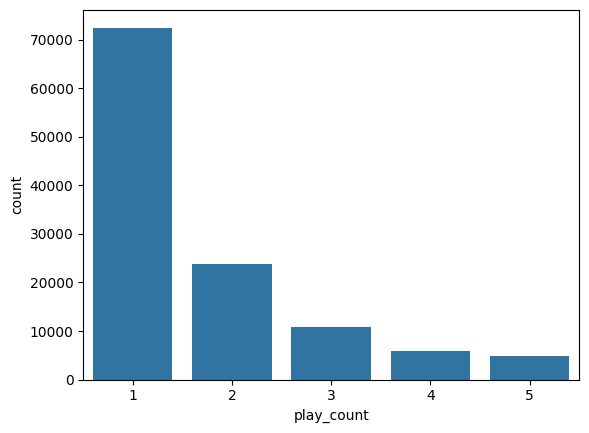

In [9]:
#After milestone
# Lets find out the distribution of users based on play count
sns.countplot(df_final,x='play_count')

In [10]:
df_final['play_count'].value_counts()

play_count
1    72473
2    23890
3    10774
4     5874
5     4865
Name: count, dtype: int64

### Observations and Insights: We can clearly see imbalance in the playcount. Any recommendation system we build will gravitate towards playcount of 1. Every model will learn little from records with playcount not equal to 1.

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [11]:
# Display total number of unique user_id
df_final['user_id'].nunique()


3155

Total number of unique song id

In [12]:
# Display total number of unique song_id
df_final['song_id'].nunique()


563

Total number of unique artists

In [14]:
# Display total number of unique artists
df_final['artist_name'].nunique()


232

### Observations and Insights: We have 3155 unique users and 563 unique songs. If multiply users to songs, we get close to 1.7 million number. It many users have not interacted with numerous songs. It means we have plenty of songs to recommend!


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [15]:
df_final['song_id'].value_counts()

song_id
8582    751
352     748
2220    713
1118    662
4152    652
       ... 
9048    103
6450    102
990     101
4831     97
8324     96
Name: count, Length: 563, dtype: int64

Most interacted users

In [16]:
df_final['user_id'].value_counts()

user_id
61472    243
15733    227
37049    202
9570     184
23337    177
        ... 
19776      1
45476      1
17961      1
14439      1
10412      1
Name: count, Length: 3155, dtype: int64

### Observations and Insights: Most interacted user only listened to 243 songs out of 563. Most interacted song listened by only 751 users out of 3155.


Songs played in a year

In [17]:
# Find out the number of songs played in a year
  # Hint: Use groupby function on the 'year' column
df_final.groupby(['year'])['song_id'].value_counts()

year  song_id
0     352        748
      2220       713
      1334       570
      8138       524
      605        510
                ... 
2010  7575       131
      5101       130
      5210       122
      1674       117
      6350       110
Name: count, Length: 563, dtype: int64

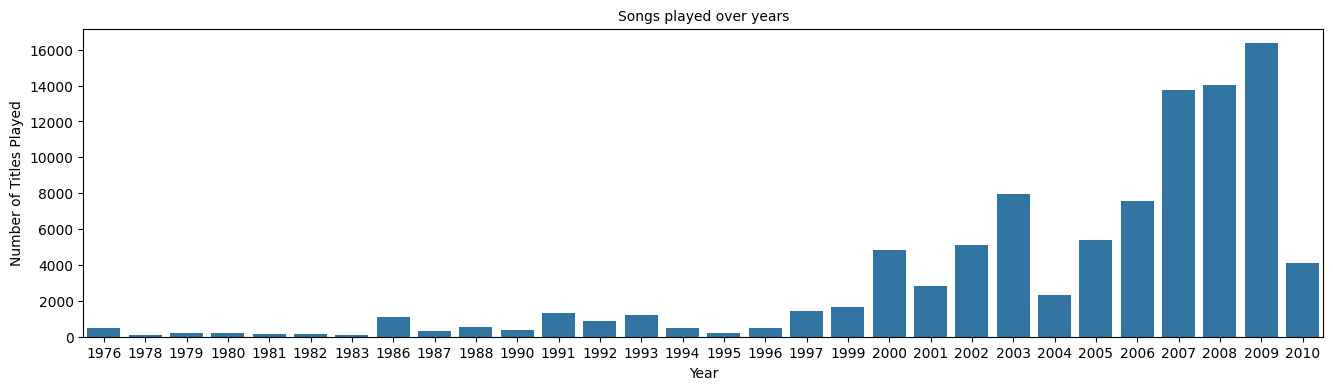

In [18]:
# Create a barplot plot with y label as "number of titles played" and x -axis year
# Set the figure size
plt.figure(figsize = (16,4))

sns.countplot(x="year", data=df_final[df_final['year'] > 1975])
plt.title("Songs played over years", fontsize = 10)

# Set the x label of the plot
plt.xlabel("Year", fontsize = 10)

# Set the y label of the plot
plt.ylabel("Number of Titles Played", fontsize = 10)

# Show the plot
plt.show()

### Observations and Insights: I created plot from year 1975 till 2010. We can see uptick on count from 2000 to 2010.

**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [19]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_count = df_final[['user_id','song_id','play_count']].groupby('song_id').mean()['play_count']

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
play_freq = df_final[['user_id','song_id','play_count']].groupby('song_id').count()['play_count']

In [20]:
# Making a dataframe with the average_count and play_freq
final_count_freq = pd.DataFrame({'avg_count': average_count, 'play_freq': play_freq})
# Let us see the first five records of the final_play dataset
final_count_freq.head()

,avg_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [21]:
# Build the function to find top n songs
def topn_songs(data,n=5,min_count=5):

  # Lets find all songs with minimum interactions
  recommendations = data[data['play_freq'] > min_count]

  # Lets sort the values with respect to average rating
  recommendations = recommendations.sort_values(by = 'play_freq', ascending = False)

  # Index values are used to retrive required row from original data
  return recommendations.index[:n]

In [ ]:
# Recommend top 10 songs using the function defined above
topn_songs(final_count_freq,n=10)

### Observations and Insights: Top songs should incorporated as portlet or link for users on their Desktop/Mobile etc version of music platform.

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [23]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162996 sha256=d4ade0bd5dd02bc934f71dc45d66498b2d61f65cd33c3ef12d1479abe6a7472d
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [24]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [25]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [26]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale = (0, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42)

### Observations and Insights ==> Below code added to handle the issue of imbalanced dataset. <==

In [28]:
# After milestone: Since data is heavily imbalanced towards play_count = 1, we will use SMOTE algorithm to oversample the minority class
# Minority classes are play_count of (2,3,4,5)
# SMOTE helps in improving model performance but comes with risk of overfitting and noise.
# Hence we will perform limited oversampling.

# We will oversample training set of original data
raw_ratings = [(trainset.to_raw_uid(uid), trainset.to_raw_iid(iid), rating) for (uid, iid, rating) in trainset.all_ratings()]
raw_ratings_df = pd.DataFrame(raw_ratings,columns=['user_id','song_id','play_count'])


#install required library for SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE  # Install imblearn library if not available

#Separate features and target variable
X = raw_ratings_df.drop('play_count', axis=1)
y = raw_ratings_df['play_count']

# transform the dataset
#Original class (play_count) distribution:
#Counter({1.0: 43536, 2.0: 14299, 3.0: 6459, 4.0: 3507, 5.0: 2924})

# Keeping the majority class the same count. class 2 and 3 are doubled and 4 and 5 are trippled in size.
# I have increased individual classes count proportionately to maintain the structure of original dataset.
strategy = {1:43536, 2:28598, 3:12918, 4:10521, 5:8772}

oversample = SMOTE(sampling_strategy=strategy)
X_resample, y_resample = oversample.fit_resample(X, y)

print("Original class distribution:")
print(Counter(y))
print(np.mean(y))

print("Oversampled class distribution:")
print(Counter(y_resample))
print(np.mean(y_resample))


Original class distribution:
Counter({1.0: 43536, 2.0: 14299, 3.0: 6459, 4.0: 3507, 5.0: 2924})
1.6989607635206787
Oversampled class distribution:
Counter({1.0: 43536, 2.0: 28598, 3.0: 12918, 4.0: 10521, 5.0: 8772})
2.1604293449614262


In [29]:
# Create DataFrame from resampled data
df_resampled = pd.DataFrame(X_resample, columns=X.columns)  # Use original feature names
df_resampled["play_count"] = y_resample  # Add target variable as a column

# Re-build the trainset with the entire new dataframe. We only oversample the training set so that we preserve the testset as authentic to real world scenario.
data_resampled = Dataset.load_from_df(df_resampled,reader)
trainset_resampled = data_resampled.build_full_trainset() #we are building trainset from entire dataframe

In [30]:
# combine the oversampled data with remaining data of the original dataframe (df_final)
testset_df = pd.DataFrame(testset,columns=['user_id','song_id','play_count'])
df_combined = pd.concat([df_resampled, testset_df], ignore_index=True)

# We need a Surprise object from this dataframe for GridSearch
data_combined = Dataset.load_from_df(df_combined, reader)

**Think About It:** How changing the test size would change the results and outputs?

### Observations and Insights: See below the metrics comparision chart
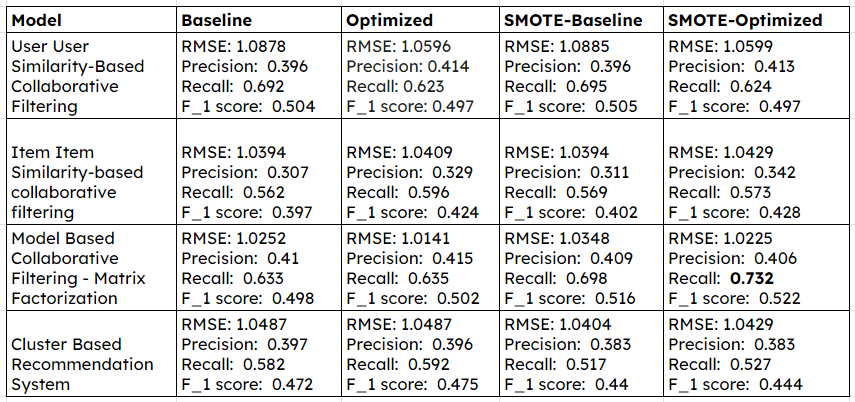

### Observations and Insights: Please note all models below has oversampled data runs.

In [33]:
# Build the default user-user-similarity model, Cosine similarity is a metric used to measure how similar
# two vectors are in a multi-dimensional space. It doesn't consider the magnitude (length) of the vectors, but rather focuses on the direction or orientation.
sim_options = {'name': 'cosine', 'user_based': True}

# KNN algorithm is used to find desired similar items
# Use random_state = 1
# KNNBasic relies on the principle that users with similar preferences in the past are likely to have similar preferences in the future.
# It identifies the k nearest neighbors (most similar users) for a target user and predicts their ratings for unseen items based on the ratings of those neighbors.
sim_user_user_resampled = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user_resampled.fit(trainset_resampled) # <== for orignal dataset "trainset", for SMOTE-Oversampled "trainset_resampled" same with model "sim_user_user_resampled"

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user_resampled)

In [ ]:
df_final[df_final.user_id == 6958].head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user_resampled.predict(6958, 447, r_ui = 1, verbose = True)

user: 6958       item: 447        r_ui = 1.00   est = 1.38   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=447, r_ui=1, est=1.3777571547845615, details={'actual_k': 40, 'was_impossible': False})

### After Milestone observation: For known value, resampled-data model gave 1.28 estimate and original-data model gave 1.12.

In [51]:
def n_users_not_interacted_with(n, data, song_id):
    users_interacted_with_song = set(data[data['song_id'] == song_id]['user_id'])
    all_users = set(data['user_id'])
    return list(all_users.difference(users_interacted_with_song))[:n] # where n is the number of elements to get in the list

In [ ]:
n_users_not_interacted_with(5, df_final, 447)

[8194, 49157, 32773, 8199, 40969]

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user
sim_user_user_resampled.predict(8194, 447, verbose = True)

user: 8194       item: 447        r_ui = None   est = 1.33   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=8194, iid=447, r_ui=None, est=1.3257243148474793, details={'actual_k': 40, 'was_impossible': False})

### After milestone observation is same as: Prediction with known play count example is pretty good. With not-listened song, estimate value is less than 1.5, means user may not play twice.

Now, let's try to tune the model and see if we can improve the model performance.

In [33]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [30, 40, 50], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine','Pearson'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data_combined) # <=== resampled data

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

In [35]:
# Train the best model found in above gridsearch
sim_options = {'name': 'msd', 'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimzed = KNNBasic(sim_options = sim_options, k = 50, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_user_user_optimzed.fit(trainset_resampled)

# Let us compute precision@k and recall@k
precision_recall_at_k(sim_user_user_optimzed)

In [36]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimzed.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.59   {'actual_k': 50, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.5937247466898732, details={'actual_k': 50, 'was_impossible': False})

In [37]:
def n_song_not_interacted_with(n, data, user_id):
    users_interacted_with_song = set(data[data['user_id'] == user_id]['song_id'])
    all_songs = set(data['song_id'])
    return list(all_songs.difference(users_interacted_with_song))[:n] # where n is the number of elements to get in the list

In [38]:
n_song_not_interacted_with(5,df_final,6958)

[2048, 6148, 21, 22, 6175]

In [39]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimzed.predict(6958, 21, verbose = True)

user: 6958       item: 21         r_ui = None   est = 1.67   {'actual_k': 50, 'was_impossible': False}


Prediction(uid=6958, iid=21, r_ui=None, est=1.6707300914270582, details={'actual_k': 50, 'was_impossible': False})

### After milestone with oversampled data: Known play count of 2, model predicted 1.59. For un-known 1.67.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [40]:
# Use inner id 0
# Get neighbors
users0_neighors_internalids = sim_user_user_optimzed.get_neighbors(0,k=5)

for inner_id in users0_neighors_internalids:
  print(trainset.to_raw_uid(inner_id) )


8112
37944
56747
64307
3643


Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [41]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user song interactions matrix
    user_song_interactions_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those song ids which the user_id has not visited yet
    non_interacted_songs = user_song_interactions_matrix.loc[user_id][user_song_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the business ids which user_id has not interacted yet
    for song in non_interacted_songs:

        # Predicting the songs for those non visited restaurant ids by this user
        est = algo.predict(user_id, song).est

        # Appending the predicted ratings
        recommendations.append((song, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [45]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final,47786,5,sim_user_user_optimzed)

In [43]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_count"
recommendations = pd.DataFrame(recommendations, columns = ['song_id', 'predicted_count'])
recommendations

,song_id,predicted_count
0,7224,3.390339
1,6450,2.917082
2,8831,2.511493
3,8324,2.502455
4,5158,2.499119


### Observations and Insights: Model seems very optimistic predicting user will play these songs more than or equal to 3 times.

### Correcting the play_counts and Ranking the above songs

In [44]:
def ranking_songs(recommendations, final_count):
  # Sort the songs based on play counts
  ranked_songs = final_count.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()
  #ranked_songs = final_count[final_count['song_id'].isin(recommendations['song_id'])].sort_values('play_count', ascending = False)[['play_count']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = final_count.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_count'] = ranked_songs['predicted_count'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_count', ascending = False)

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [46]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_count_freq)


,song_id,avg_count,play_freq,predicted_count,corrected_count
2,7224,3.373832,107,3.390339,3.293665
1,6450,2.578431,102,2.917082,2.818067
4,8831,1.962617,107,2.511493,2.414820
0,5158,1.928571,126,2.499119,2.410032
3,8324,2.625000,96,2.502455,2.400393


### Observations and Insights: We substract the quantity instead of addition because we may overshoot the 5 hightest value limit for the play count. Correcting predicted value has mixed results.

### Item Item Similarity-based collaborative filtering recommendation systems

In [47]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
sim_options = {'name': 'cosine', 'user_based': False}

# KNN algorithm is used to find desired similar items. Use random_state=1
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the trainset, and predict ratings for the test set
sim_item_item.fit(trainset_resampled)

# Let us compute precision@k, recall@k, and f_1 score
precision_recall_at_k(sim_item_item)

In [48]:
df_final.query("user_id == 6958 &song_id == 1671")

,user_id,song_id,play_count,title,release,artist_name,year
8,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003


In [49]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.59   {'actual_k': 22, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.5876594553390646, details={'actual_k': 22, 'was_impossible': False})

In [52]:
n_users_not_interacted_with(5,df_final,1671)

[8194, 49157, 32773, 8199, 40969]

In [53]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(8194, 1671, verbose = True)

user: 8194       item: 1671       r_ui = None   est = 1.65   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=8194, iid=1671, r_ui=None, est=1.6455179645415152, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Apply grid search for enhancing model performance
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
            }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data_combined)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.1820746830956506
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [54]:
# Apply the best modle found in the grid search
sim_options = {'name': 'msd', 'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_resampled_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_item_item_resampled_optimized.fit(trainset_resampled)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_resampled_optimized)


In [55]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_resampled_optimized.predict(6958,1671,verbose = True)

user: 6958       item: 1671       r_ui = None   est = 1.42   {'actual_k': 22, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=None, est=1.4204642748419143, details={'actual_k': 22, 'was_impossible': False})

In [56]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_resampled_optimized.predict(6958,3232,verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.47   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4746440368585654, details={'actual_k': 20, 'was_impossible': False})

### After milestone it is same observation: For known play count, prediction was not close enough.

In [57]:
# Find five most similar items to the item with inner id 0
neighors_internalids = sim_item_item_resampled_optimized.get_neighbors(0,k=5)

for inner_id in neighors_internalids:
  print(trainset.to_raw_iid(inner_id) )


4636
8138
9981
4811
2048


In [61]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_resampled_optimized)

In [60]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
recommendations = pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])
recommendations

,song_id,predicted_play_count
0,9942,1.928091
1,3050,1.885211
2,2842,1.810051
3,4939,1.771190
4,1691,1.739468


In [62]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_count_freq)


,song_id,avg_count,play_freq,predicted_count,corrected_count
4,9942,2.486667,150,1.928091,1.846441
2,3050,1.690987,233,1.885211,1.819698
1,2842,1.706897,232,1.810051,1.744397
3,4939,1.759398,133,1.771190,1.684479
0,1691,1.614458,249,1.739468,1.676096


### Observations and Insights: We can use corrected count, it seems acceptable.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [63]:
# Build baseline model using svd
# Using SVD matrix factorization. Use random_state = 1
svd = SVD(random_state = 1)

# Training the algorithm on the trainset
svd.fit(trainset_resampled)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

In [64]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958,1671, r_ui = 2,verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.4845008723011075, details={'was_impossible': False})

In [65]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958,3232,verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.46   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4599574007739529, details={'was_impossible': False})

### After milestone observations: Model not there yet.

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data_combined)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.1116051801896571
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [66]:
# Building the optimized SVD model using optimal hyperparameters
svd_resampled_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Train the algorithm on the trainset
svd_resampled_optimized = svd_resampled_optimized.fit(trainset_resampled)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_resampled_optimized)

In [68]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_resampled_optimized.predict(6958,1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.53   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.533454059546392, details={'was_impossible': False})

In [69]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_resampled_optimized.predict(6958,3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.58   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5848685811683485, details={'was_impossible': False})

### After milestone, with oversampled and optimized, it is accepable results. For known case, estimate is above 1.5 play count.

In [73]:
# Getting top 10 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations_svd = get_recommendations(df_final, 6958, 10, svd_resampled_optimized)

In [74]:
# Ranking songs based on above recommendations
ranking_songs(recommendations_svd, final_count_freq)

,song_id,avg_count,play_freq,predicted_count,corrected_count
9,7224,3.373832,107,2.780128,2.683455
6,5531,2.309061,618,2.357211,2.316985
8,6450,2.578431,102,2.315085,2.216070
4,2220,2.220196,713,2.193808,2.156358
7,5653,2.296296,108,2.228828,2.132603
1,614,2.217158,373,2.171171,2.119393
2,657,2.218543,151,2.170586,2.089207
5,4284,2.023861,461,2.088922,2.042347
3,1664,2.177835,388,2.091897,2.041130
0,352,2.184492,748,2.068871,2.032308


In [75]:
final_count_freq.describe()

,avg_count,play_freq
count,563.000000,563.000000
mean,1.652936,209.371226
std,0.217654,117.576729
min,1.238710,96.000000
25%,1.492805,129.000000
50%,1.626761,160.000000
75%,1.765858,247.000000
max,3.373832,751.000000


### After milestone oversampled data -  These are good predicted counts. We can see predicted and corrected count present closer to average. I will go with corrected count as it is beneficial with imbalanced data as it will try to bring the value closer to average in extreme cases.

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [76]:
# Make baseline clustering model
# Using Co-Clustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset_resampled)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(clust_baseline)

In [77]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, verbose = True)

user: 6958       item: 1671       r_ui = None   est = 1.26   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=None, est=1.264831305283325, details={'was_impossible': False})

In [78]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.435454149673668, details={'was_impossible': False})

### Observations and Insights: Not much improvement even with oversampled data.

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [3, 4, 5, 6], 'n_cltr_i': [3, 4, 5, 6], 'n_epochs': [30, 40, 50]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data_combined)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.1725701741645258
{'n_cltr_u': 4, 'n_cltr_i': 3, 'n_epochs': 50}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [79]:
# Train the tuned Coclustering algorithm
clust_tuned_resampled = CoClustering(n_cltr_u = 4,n_cltr_i = 3, n_epochs = 50, random_state = 1)

# Training the algorithm on the train set
clust_tuned_resampled.fit(trainset_resampled)

# Let us compute precision@k and recall@k
precision_recall_at_k(clust_tuned_resampled,k=50)

In [80]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned_resampled.predict(6958, 1671, verbose = True)

user: 6958       item: 1671       r_ui = None   est = 1.05   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=None, est=1.0526277069148189, details={'was_impossible': False})

In [81]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned_resampled.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.22   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2232505513051612, details={'was_impossible': False})

### Observations and Insights: Oversampled and optimized still not acceptable levels from this model.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [82]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
recommendations_cc = get_recommendations(df_final,6958,5,clust_tuned_resampled)

### Correcting the play_count and Ranking the above songs

In [83]:
# Ranking songs based on the above recommendations
ranking_songs(recommendations_cc, final_count_freq)

,song_id,avg_count,play_freq,predicted_count,corrected_count
2,7224,3.373832,107,4.148355,4.051681
1,6450,2.578431,102,3.542568,3.443553
3,8324,2.625000,96,3.273629,3.171567
4,9942,2.486667,150,3.183701,3.102051
0,657,2.218543,151,3.056417,2.975038


### Observations and Insights: Corrected values seems better in this instance.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [84]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_final['text'] = df_final['title'] + df_final['release'] + df_final['artist_name']
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
0,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And PrudenceDistillationErin McKeown
1,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael ValentineSawdustThe Killers
2,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album)Vampire WeekendVampir...
3,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow YouTiny VipersTiny Vipers
4,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey ManYou Know I'm No GoodAmy Winehouse


In [85]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_final[['user_id','song_id','play_count','title','text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset=['title'])

# Set the title column as the index
df_small.set_index('title', inplace=True)

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And PrudenceDistillationErin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael ValentineSawdustThe Killers
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album)Vampire WeekendVampir...
They Might Follow You,6958,703,1,They Might Follow YouTiny VipersTiny Vipers
Monkey Man,6958,719,1,Monkey ManYou Know I'm No GoodAmy Winehouse


In [86]:
# Create the series of indices from the data
index_series = pd.Series(df_small.index)

In [87]:
# Importing necessary packages to work with text data
import nltk
nltk.download('omw-1.4') # Essentially, this code downloads the Open Multilingual Wordnet version 1.4 data for use with NLTK

# Download punkt(punctuations) library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [88]:
# Create a function to tokenize the text
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [89]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
songs_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [90]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(songs_tfidf, songs_tfidf)

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [91]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = index_series[index_series == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [92]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly',similar_songs)


[345, 423, 234, 509, 374, 370, 371, 372, 373, 376]


['From Left To Right',
 'Nothing Better (Album)',
 'The Pretender',
 'Everlong',
 'Who Let You Go?',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 "Sam's Town"]

### Observations and Insights: I would like to input these results in separate tab or portlet for user under similar songs. Then gather usage of it by user to check further on the effeciency. It would be better if we also had genre of music.

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
- Answer: Due to data imbalance, all the models with metrics were very close to each other. At this point no model stands out. Then I decided to use SMOTE oversampling alogorithm, it creates synthetic data based on current distribution of minority class.

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
- Answer: Since data is heavily imbalanced (60% record belongs to one class, 40% for remaining 4 classes), we need a combined approach towards final solution. Also data shows ample opportunity for recommendation as user and songs interaction is sparse.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?
- Answer: I have decided to go with SVD Optimzed with oversampling. It save me best score of Recall 0.73 compared to any other models. Even the F_1 score 0.52 did well compared to other. From all the songs that can be recommendated to user, how many are actually recommended and Recall helps with that hence I chose this metric. We should also include top 10 popular and top 10 similiar songs output into platform for better user experience.